# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

# Objective
To predict which passengers survived the tragedy.

# Data Files
Train Dataset = titanic_train.csv

Test Dataset = titanic_test.csv

# Data Dictionary
PassengerId - Passenger's number

Survived - Survival state (1 = Survived; 0 = Died)

Pclass - Passenger's class (1 = 1st; 2 = 2nd; 3 = 3rd)

Name - Passenger's name

Sex - Passenger's sex (male; female)

Age - Passenger's age (fractional if less than one)

SibSp - Number of siblings/spouses aboard

Parch - Number of parents/children aboard

Ticket - Ticket's description

Fare - Passenger's fare

Cabin - Cabin's description

Embarked - Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Train dataset has 891 rows and 12 columns.

Test dataset has 418 rows and 11 columns.

# Import the libraries

In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Read both train and test dataset.
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

In [8]:
total = pd.concat([train,test])

D:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [9]:
total.shape

(1309, 12)

In [10]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [11]:
total.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

# Feature Engineering

In [12]:
total['Age']= total['Age'].fillna(np.nanmedian(total['Age'])) 
total['Fare']= total['Fare'].fillna(np.nanmedian(total['Fare']))

In [13]:
total['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [14]:
total['Embarked']=total['Embarked'].fillna('S')

In [15]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [16]:
total.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.503186,33.281086,0.385027,655.000000,2.294882,0.498854,0.383838
std,12.905241,51.741500,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,22.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,35.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


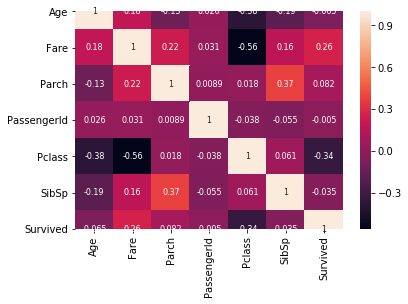

In [17]:
corr=total.corr()
sns.heatmap(corr,annot=True, annot_kws = { 'fontsize' : 8 })

In [18]:
total['Embarked']=total['Embarked'].replace({'S':0,'C':1,'Q':2})

In [19]:
total['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [20]:
total['Sex']=total['Sex'].replace({'male':0,'female':1})

In [21]:
total1=total.drop(['Cabin','Name','Survived','Ticket','PassengerId'],axis=1)

In [22]:
train1=total1.iloc[:891,:]
test1=total1.iloc[891:,:]
target1=train['Survived']

In [23]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy= train_test_split(train1,target1,test_size=0.2,random_state=100,stratify=target1)

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
modellr=LogisticRegression()
modellr.fit(trainx,trainy)
predlr=modellr.predict(testx)

D:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(predlr,testy)

0.8100558659217877

In [26]:
predlr1=modellr.predict(test1)

# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
modeldt = DecisionTreeClassifier(criterion='gini')
# model = tree.DecisionTreeRegressor()
modeldt.fit(trainx,trainy)

preddt=modeldt.predict(testx)

In [28]:
accuracy_score(preddt,testy)

0.7877094972067039

In [29]:
preddt1=modeldt.predict(test1)

# Support Vector Machine 

In [30]:
from sklearn.svm import SVC
modelsvm =SVC(gamma='scale')
modelsvm.fit(trainx,trainy)
predsvm=modelsvm.predict(testx)

In [31]:
accuracy_score(predsvm,testy)

0.7039106145251397

In [32]:
predsvm1=modeldt.predict(test1)

# Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
modelnb = GaussianNB()
modelnb.fit(trainx,trainy)
prednb=modelnb.predict(testx)

In [34]:
accuracy_score(prednb,testy)

0.8156424581005587

In [35]:
prednb1=modelnb.predict(test1)

# K- Nearest Neighbours

In [36]:
from sklearn.neighbors import KNeighborsClassifier
modelknn=KNeighborsClassifier(n_neighbors=6)
modelknn.fit(trainx,trainy)
predknn=modelknn.predict(testx)

In [37]:
accuracy_score(predknn,testy)

0.6759776536312849

In [38]:
predknn1=modelknn.predict(test1)

# Gradient Boosting

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
modelgb=GradientBoostingClassifier(n_estimators=45,learning_rate=.15,max_depth=1)
modelgb.fit(trainx,trainy)
predgb=modelgb.predict(testx)

In [40]:
accuracy_score(predgb,testy)

0.8268156424581006

In [41]:
predgb1=modelgb.predict(test1)

# XGBOOST

In [42]:
from xgboost import XGBClassifier

modelxg = XGBClassifier(n_estimators=1100, scale_pos_weight=1)
modelxg.fit(trainx , trainy)
predxg = modelxg.predict(testx)

In [43]:
accuracy_score(predxg,testy)

0.8603351955307262

In [44]:
predxg1=modelxg.predict(test1)

# Output

In [47]:
final=pd.DataFrame()
final['Passenger Id'] = test['PassengerId']
final['Survived'] = predxg1
final.to_csv('titanicXGBoost.csv', index=False)

In [48]:
final.head()

,Passenger Id,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


# Conclusion
I deployed XGBoost model and successfully predicted whether passengers survived or not after the disaster.I used accuracy score as an evaluation metric and achieved accuracy score of 86%.